In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [146]:
df=pd.read_csv("advertising.csv")

#importing the csv file

In [147]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [148]:
#Checking names of all columns
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [149]:
df.drop('Unnamed: 0',inplace=True,axis=1)
#Unnamed column is not needed therefore we drop it

In [150]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [151]:
print(df.shape)
df.describe()

(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Above we can see count, mean, std, min, 25%, 50%, 75% and max values of each columns. We can see that 50%iqr value and mean value are almost same. so we can say that the data is following normal distribution

In [152]:
#checking null values
print(df.isnull().sum())
df.isna().sum()

#there are no null values in the data

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

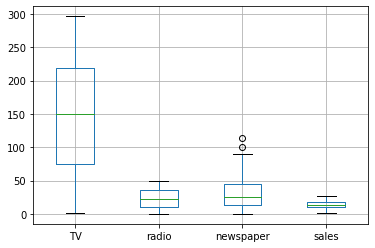

In [153]:
df.boxplot()# Checking for outiers

# we can see that there are only few outiers in newspaper column and they are almost near maximum range. so no need to eliminate them.

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


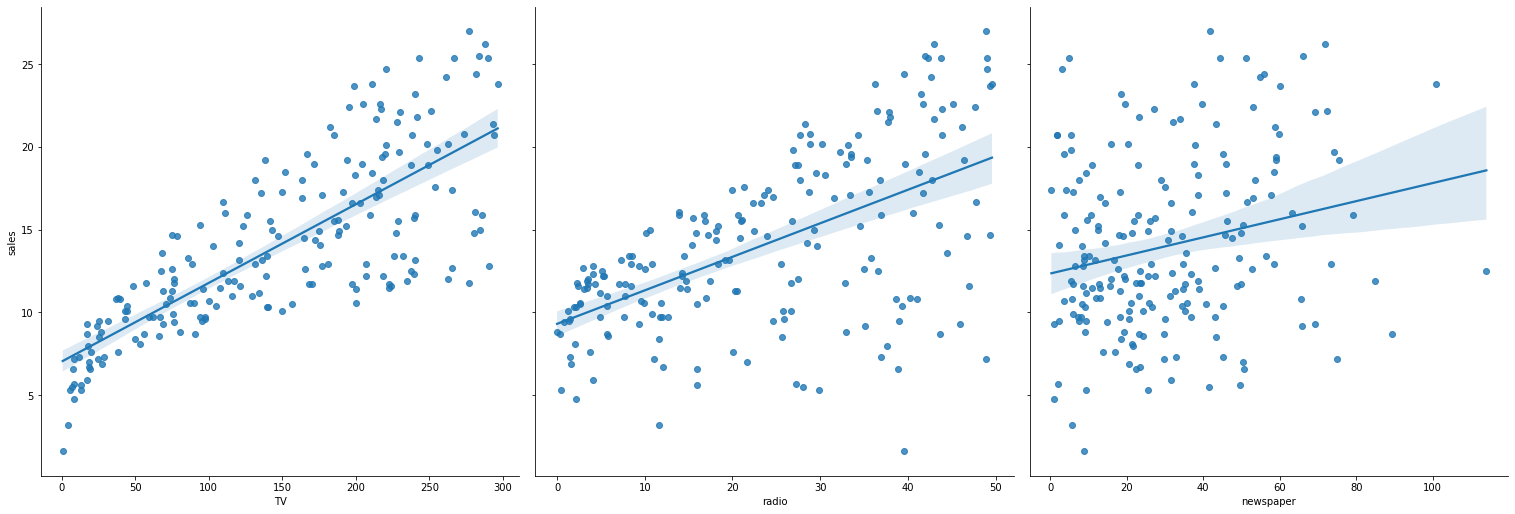

In [154]:
print(df.corr())
import seaborn as sns
sns.pairplot(df, x_vars = ['TV','radio','newspaper'], y_vars='sales',size=7, kind='reg')
#Tv will impact the sales more when compared with radio and newspapers, newspapers has very low imacpt among the vairables.

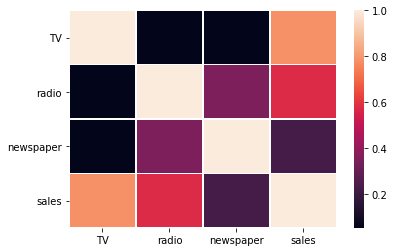

In [155]:

import matplotlib.pylab as plt

ax = sns.heatmap(df.corr(), linewidth=0.5)
plt.show()

In [156]:
#Separting independent and target varibles to Train and test repectively
Train = df[["TV","radio","newspaper"]] 
test = df.sales

In [157]:
#data training phase
from sklearn.preprocessing import MinMaxScaler
minMaxScaler=MinMaxScaler()
Scaled_Train=minMaxScaler.fit_transform(Train)
Scaled_Train= pd.DataFrame(Scaled_Train)

In [158]:
from sklearn.model_selection import train_test_split
Train_X,Test_X,Train_Y,Test_Y = train_test_split(Scaled_Train,test,test_size=0.2, random_state=42)
#splitting the data into training and testing

In [159]:
Train_X.shape,Train_Y.shape
#shows no of columns and rows

((160, 3), (160,))

In [160]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Train_X, Train_Y)
train_predections = lm.predict(Train_X)
predictions = lm.predict(Test_X)

In [161]:
from sklearn.metrics import r2_score,mean_squared_error
print("Train R^2: ", r2_score(Train_Y, train_predections))
print("Test R^2: ", r2_score(Test_Y, predictions))

Train R^2:  0.8957008271017817
Test R^2:  0.899438024100912


In [162]:
print("RMSE :", np.sqrt(mean_squared_error(Train_Y, train_predections)))
print("RMSE :", np.sqrt(mean_squared_error(Test_Y, predictions)))

RMSE : 1.6447277656443373
RMSE : 1.7815996615334504


In [163]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             Train_X,
                             Train_Y,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [164]:
get_cv_scores(lm)

CV Mean:  0.8594884313276513
STD:  0.08455939801043014




In [165]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(Train_X, Train_Y)
# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.8548552288456215
STD:  0.07095940984657524




In [166]:
#Gridsearch to find best paramaters
from sklearn.model_selection import GridSearchCV


alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(Train_X, Train_Y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.8597286854371129
Best Params:  {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished


In [167]:
# using alpha=0.1
ridge = Ridge(alpha=0.1).fit(Train_X, Train_Y)
# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.8597286854371129
STD:  0.08282965674359882




we can see improvement in the CV mean score

# Ensemble Technique

In [168]:
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features': ['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(Train_X, Train_Y)
print(clf.best_params_)
#best parameters

{'criterion': 'mae', 'max_features': 'auto'}


In [171]:
rf=RandomForestRegressor()
rf.fit(Train_X, Train_Y)
pred_decision=rf.predict(Test_X)

rfs=r2_score(Test_Y,pred_decision)
print("R2 score:",rfs*100)

rfscore=cross_val_score(rf,Scaled_Train,test,cv=5)
rfc=rfscore.mean()
print('cross_val_score',rfc*100)

R2 score: 98.32601127683694
cross_val_score 97.5349798212636


we are getting model accuracy and cross validation at 98.32% and 97.53%, which shows our model is performing well

In [172]:
import joblib
joblib.dump(rf,'Advertising Sales Channel Prediction.obj') #save the model as object file

['Advertising Sales Channel Prediction.obj']